In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df_online = pd.read_csv('data.csv',encoding='unicode_escape')
df_online

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df_online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df_online.shape


(541909, 8)

In [6]:
df_online.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df_online.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
df_online.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df_online.dropna(subset=['CustomerID'],axis = 0, inplace=True)


In [10]:
df_online.shape

(406829, 8)

In [11]:
df_online.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
df_online['Date'] = pd.to_datetime(df_online['InvoiceDate'])
df_online['Month-Year'] = df_online['Date'].dt.strftime('%b-%Y')
df_online.drop(['InvoiceDate','Date'],axis=1,inplace=True)

In [13]:
df_online.reset_index(drop=True, inplace=True)


In [14]:
df_online

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011


In [15]:
df_online['Description'].value_counts()


WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [16]:
columns=["Description", "Quantity", "UnitPrice" ]


In [17]:
df_max = df_online[df_online['Description'] == "WHITE HANGING HEART T-LIGHT HOLDER"][columns]
df_max

,Description,Quantity,UnitPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
49,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
66,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
220,WHITE HANGING HEART T-LIGHT HOLDER,64,2.55
262,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55
...,...,...,...
403929,WHITE HANGING HEART T-LIGHT HOLDER,1,2.95
403964,WHITE HANGING HEART T-LIGHT HOLDER,2,2.95
404428,WHITE HANGING HEART T-LIGHT HOLDER,6,2.95
405907,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55


In [18]:
df_quan = df_online.groupby('Description')['Quantity'].sum().reset_index()
df_quan.columns = ['Description', 'Total Quantity']
df_quan

,Description,Total Quantity
0,4 PURPLE FLOCK DINNER CANDLES,140
1,50'S CHRISTMAS GIFT BAG LARGE,1883
2,DOLLY GIRL BEAKER,2391
3,I LOVE LONDON MINI BACKPACK,360
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3891,ZINC T-LIGHT HOLDER STARS SMALL,4850
3892,ZINC TOP 2 DOOR WOODEN SHELF,5
3893,ZINC WILLIE WINKIE CANDLE STICK,2595
3894,ZINC WIRE KITCHEN ORGANISER,25


In [19]:
df_quan_top15 = df_quan.nlargest(15, 'Total Quantity')
df_quan_top15

,Description,Total Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409
2612,POPCORN HOLDER,30504
2669,RABBIT NIGHT LIGHT,27094
2057,MINI PAINT SET VINTAGE,25880
2245,PACK OF 12 LONDON TISSUES,25321
2277,PACK OF 60 PINK PAISLEY CAKE CASES,24163


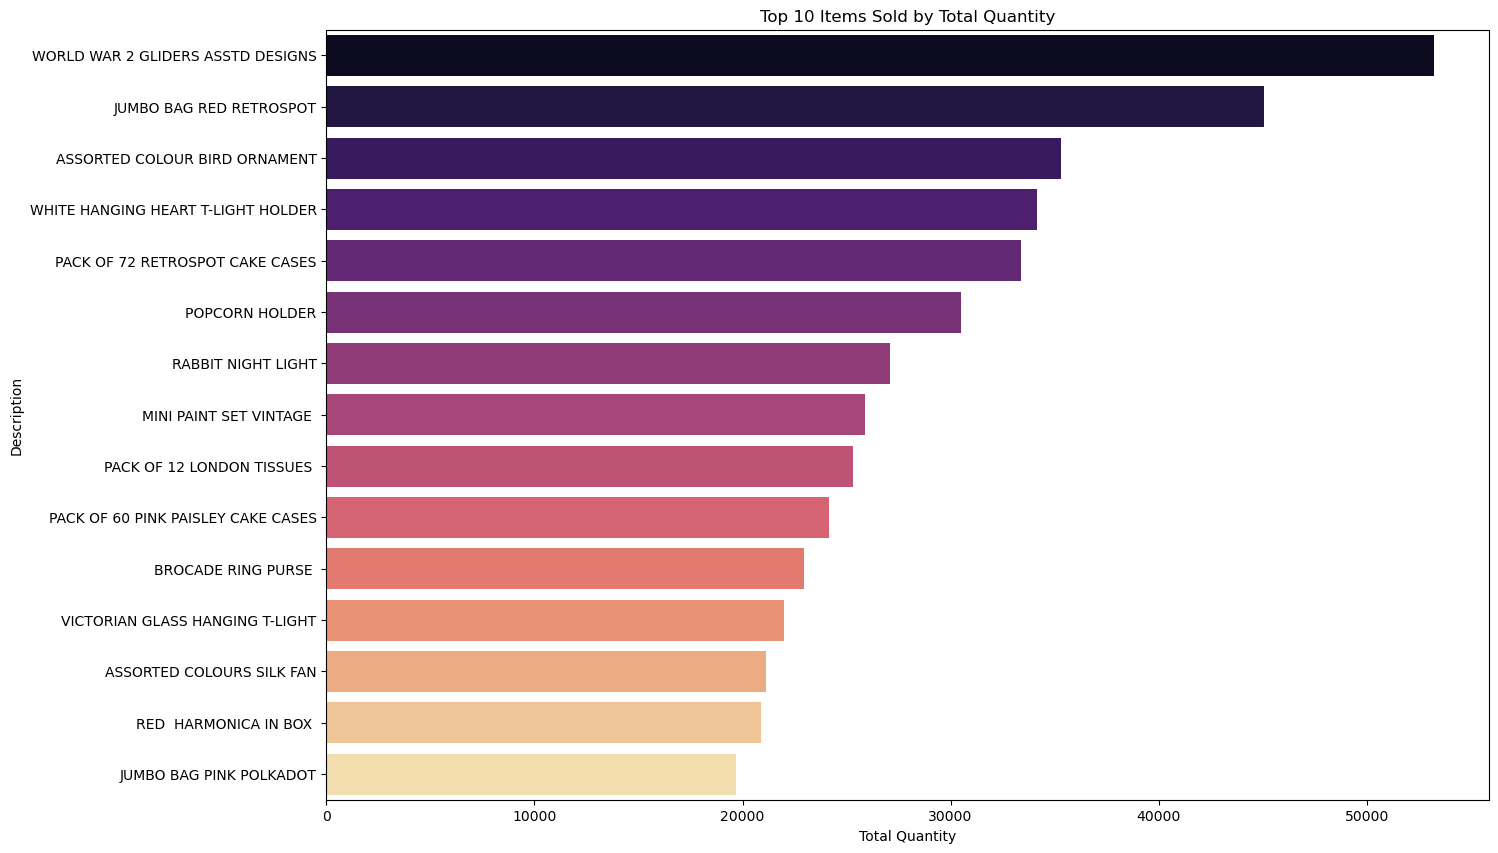

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_quan_top15, x="Total Quantity", y="Description", capsize=3, palette="magma")
plt.title("Top 10 Items Sold by Total Quantity")
plt.xlabel("Total Quantity")
plt.ylabel("Description")
plt.show()

In [21]:
df_online


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011


In [22]:
df_max

,Description,Quantity,UnitPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
49,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
66,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
220,WHITE HANGING HEART T-LIGHT HOLDER,64,2.55
262,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55
...,...,...,...
403929,WHITE HANGING HEART T-LIGHT HOLDER,1,2.95
403964,WHITE HANGING HEART T-LIGHT HOLDER,2,2.95
404428,WHITE HANGING HEART T-LIGHT HOLDER,6,2.95
405907,WHITE HANGING HEART T-LIGHT HOLDER,32,2.55


In [23]:
df_online['Total Price'] = df_online['UnitPrice'] * df_online['Quantity']
df_online.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010,20.34


C:\Users\Prince Boy\AppData\Local\Temp\ipykernel_15556\1552861146.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_online.corr(), cmap='Blues', annot=True, fmt=".2f")


<Axes: >

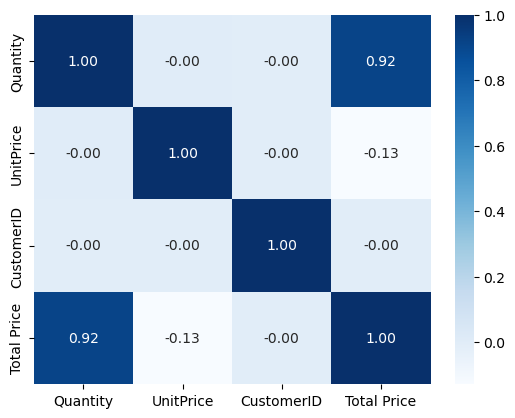

In [24]:
sns.heatmap(df_online.corr(), cmap='Blues', annot=True, fmt=".2f")

In [25]:
label_en = LabelEncoder()
df_online['StockCode_Encode'] = label_en.fit_transform(df_online['StockCode'])
df_online['Invoice_Encode'] = label_en.fit_transform(df_online['InvoiceNo'])

In [26]:
df_online

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Month-Year,Total Price,StockCode_Encode,Invoice_Encode
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Dec-2010,15.30,3249,0
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Dec-2010,20.34,2649,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Dec-2010,22.00,2855,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Dec-2010,20.34,2803,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Dec-2010,20.34,2802,0
...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,Dec-2011,10.20,1470,18535
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,Dec-2011,12.60,1746,18535
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,Dec-2011,16.60,2086,18535
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,Dec-2011,16.60,2087,18535


In [27]:
X = df_online.drop(columns=['InvoiceNo','StockCode','Month-Year','Description','Country'])
y = df_online['Total Price']

In [28]:
X


,Quantity,UnitPrice,CustomerID,Total Price,StockCode_Encode,Invoice_Encode
0,6,2.55,17850.0,15.30,3249,0
1,6,3.39,17850.0,20.34,2649,0
2,8,2.75,17850.0,22.00,2855,0
3,6,3.39,17850.0,20.34,2803,0
4,6,3.39,17850.0,20.34,2802,0
...,...,...,...,...,...,...
406824,12,0.85,12680.0,10.20,1470,18535
406825,6,2.10,12680.0,12.60,1746,18535
406826,4,4.15,12680.0,16.60,2086,18535
406827,4,4.15,12680.0,16.60,2087,18535


In [29]:
X.dtypes

Quantity              int64
UnitPrice           float64
CustomerID          float64
Total Price         float64
StockCode_Encode      int32
Invoice_Encode        int32
dtype: object

In [30]:
y


0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
406824    10.20
406825    12.60
406826    16.60
406827    16.60
406828    14.85
Name: Total Price, Length: 406829, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train

array([[-0.03636296, -0.00707983,  0.40152721, -0.03050895, -0.45122233,
         0.92579004],
       [-0.03996953, -0.00707983,  1.48876416, -0.03670136, -0.68693822,
         0.62134974],
       [-0.03996953, -0.04072785, -0.32582497, -0.04201214, -0.21550644,
         0.62098967],
       ...,
       [-0.03636296, -0.03766894, -1.18149911, -0.04016491,  0.22749729,
        -0.62431701],
       [-0.03636296, -0.01865049,  1.19945647, -0.03416142, -0.81012642,
        -0.4793883 ],
       [-0.03636296, -0.0183845 , -1.1785827 , -0.03407745, -0.82670945,
        -0.72189634]])

In [34]:
X_test

array([[-3.63629552e-02,  5.94182369e-02, -1.02342979e+00,
        -9.51772050e-03,  1.24853798e+00, -1.51333312e+00],
       [-2.91498090e-02,  6.21978448e-03, -2.30166781e-01,
        -9.72763276e-03,  3.35286970e-01,  4.08007477e-01],
       [-5.80023938e-02, -3.50090161e-02, -1.38098142e+00,
        -5.00307867e-02, -1.28748071e+00,  1.93759047e+00],
       ...,
       [-2.97224273e-04, -4.07278497e-02, -9.06190180e-01,
        -3.23141919e-02,  3.02120916e-01, -7.97691356e-01],
       [-2.91498090e-02, -4.07278497e-02,  8.48904218e-01,
        -3.93672439e-02, -8.16048933e-01,  8.18128717e-01],
       [-3.99695283e-02,  6.67330241e-02,  1.33419453e+00,
        -2.50512277e-02, -1.06532260e-01, -8.56022911e-01]])

In [35]:
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    Lasso(alpha = 10),
    Ridge(alpha = 10)
]

In [36]:
for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    
    r2_value = r2_score(y_test,y_pred)
    print(f"{m.__class__.__name__} R2 Score: {r2_value}")

LinearRegression R2 Score: 1.0
RandomForestRegressor R2 Score: 0.9934513607518394
Lasso R2 Score: 0.9995593666323072
Ridge R2 Score: 0.999999946674679


In [37]:
r2_lasso = []

In [38]:
for x in range(10,500,10):
    model_l = Lasso(alpha = x)
    model_l.fit(X_train, y_train)
    y_pred = model_l.predict(X_test)

    r2_value = r2_score(y_test,y_pred)
    r2_lasso.append(r2_value)

In [39]:
r2_lasso

[0.9995593666323072,
 0.9982374665292293,
 0.9960342996907665,
 0.9929498661169186,
 0.9889841658076858,
 0.984137198763068,
 0.9784089649830652,
 0.9717994644676774,
 0.9643086972169046,
 0.9559366632307469,
 0.9466833625092042,
 0.9365487950522763,
 0.9255329608599634,
 0.9136358599322656,
 0.900857492269183,
 0.8871978578707151,
 0.8726569567368625,
 0.8572347888676249,
 0.8409313542630023,
 0.8237466529229942,
 0.8056806848476015,
 0.7867334500368237,
 0.766904948490661,
 0.7461951802091138,
 0.7246041451921809,
 0.7021318434398629,
 0.6787782749521605,
 0.6545434397290728,
 0.6294273377706003,
 0.6034299690767426,
 0.5765513336474999,
 0.5487914314828721,
 0.5201502625828596,
 0.4906278269474622,
 0.4602241245766796,
 0.42893915547051165,
 0.39677291962895944,
 0.3637254170520219,
 0.32979664773969886,
 0.2949866116919916,
 0.25929530890889885,
 0.22272273939042087,
 0.18526890313655908,
 0.1469338001473114,
 0.1077174304226789,
 0.06761979396266127,
 0.02664089076725895,
 -4.0827

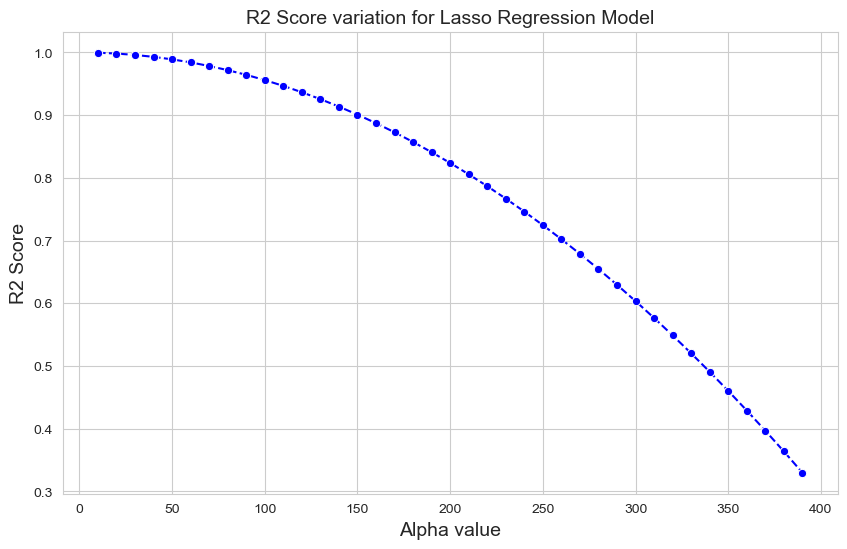

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(range(10,400,10)), y=r2_lasso[:39], marker='o', color='blue', linestyle = 'dashed')
plt.title('R2 Score variation for Lasso Regression Model',fontsize=14)
plt.xlabel('Alpha value',fontsize=14)
plt.ylabel('R2 Score',fontsize=14)
plt.show()

In [41]:
n_estim = list(range(20,160,10))

In [42]:
random_forest_R = []

In [ ]:
for n in n_estim:
    rf_R = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_R.fit(X_train,y_train)
    y_pred_ = rf_R.predict(X_test)

    r2_value = r2_score(y_test,y_pred_)
    random_forest_R.append(r2_value)

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_estim, y=random_forest_R, marker='o', color='green', linestyle = 'dashed')
plt.title('R2 Score variation for Random Forest Regression Model',fontsize=14)
plt.xlabel('Estimators',fontsize=14)
plt.ylabel('R2 Score',fontsize=14)
plt.show()

In [ ]:
random_forest_R

In [ ]:
max(random_forest_R)